# **YOLO11 (You Only Look Once)**
**YOLO** (You Only Look Once) is a popular object detection model known for its speed and accuracy. It performs real-time object detection by processing the entire image in a single pass, making it highly efficient for various applications.

<img src = https://learnopencv.com/wp-content/uploads/2025/02/Yolo_Models_Timeline.png >





## **YOLO11**

YOLO11 is a SOTA Object Detection model improving upon its predecessors. Its extra-large model achieves an highest **COCO mAP50:95** of **54.7**.
### **YOLO11 Family of Models:**

| Model   | Size (pixels) | mAPval 50-95 | Speed CPU ONNX (ms) | Speed T4 TensorRT10 (ms) | Params (M) | FLOPs (B) |
|---------|--------------|--------------|----------------------|--------------------------|------------|-----------|
| YOLO11n | 640          | 39.5         | 56.1 ± 0.8           | 1.5 ± 0.0                | 2.6        | 6.5       |
| YOLO11s | 640          | 47.0         | 90.0 ± 1.2           | 2.5 ± 0.0                | 9.4        | 21.5      |
| YOLO11m | 640          | 51.5         | 183.2 ± 2.0          | 4.7 ± 0.1                | 20.1       | 68.0      |
| YOLO11l | 640          | 53.4         | 238.6 ± 1.4          | 6.2 ± 0.1                | 25.3       | 86.9      |
| YOLO11x | 640          | 54.7         | 462.8 ± 6.7          | 11.3 ± 0.2               | 56.9       | 194.9     |

### **YOLO11 vs Other Object Detectors:**

<img src =https://raw.githubusercontent.com/ultralytics/assets/refs/heads/main/yolo/performance-comparison.png>

### **Key Features:**

- **Highly Adaptable**: The YOLO11 family contains models of different sizes that are appropriate for different applications. Small models can be used on the edge, while larger models can run on the servers for better accuracy.

- **Multiple Supported Tasks**: Object detection, instance segmentation, classification, pose estimation, oriented object detection.

### **Resources:**
**Github**: [YOLO11 Repository](https://github.com/ultralytics/ultralytics)

**Blogpost**: [YOLO11 on LearnOpenCV](https://learnopencv.com/yolo11/)

**Ultralytics**: [Ultralytics](https://ultralytics.com) is a platform built upon PyTorch, hosting various models like **YOLOv5**, **YOLOv8**, **YOLOv9**, **YOLOv10**, **YOLO11**, **SAM** and **RW-DETR** and simplifies the process of training, inference and deployment.  In this final tutorial notebook, we will make use of ultralytics library to perform Object Detection task with **YOLO11**.



### Installing Dependencies

In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00


In [ ]:
!wget -q https://learnopencv.com/wp-content/uploads/2024/08/soccer-scaled.jpg -O football.jpg
!wget -q https://learnopencv.com/wp-content/uploads/2024/08/zebra-yolov10-scaled.jpg -O zebra.jpg
!wget -q https://learnopencv.com/wp-content/uploads/2024/08/monitor-yolov10-scaled.jpg -O monitor.jpg
!wget -q https://learnopencv.com/wp-content/uploads/2024/08/kitchen-scaled.jpg -O kitchen.jpg
!wget -q https://learnopencv.com/wp-content/uploads/2024/08/cat-dog-yolov10-v1.jpeg -O cat-dog.jpg
!wget -q https://learnopencv.com/wp-content/uploads/2025/02/tiger-scaled.jpg -O tiger.jpg
!wget -q https://learnopencv.com/wp-content/uploads/2025/02/boat-ob.jpg -O boat.jpg

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Common Utility

Let's define a common utility to plot predictions for all tasks.

In [ ]:
def prediction(model_type, img_path, display_result = False, task : str = None):

    model = YOLO(model_type)
    result = model(img_path, save = True, conf=0.5)

    for r in result:
        pred_img_path = f"{r.save_dir}/{img_path}"
        pred = cv2.cvtColor(cv2.imread(pred_img_path), cv2.COLOR_BGR2RGB)
        plt.imshow(pred)
        plt.axis('off')
        plt.title(f"YOLO11 - {task}")
    plt.show()

    # To print the results
    if display_result:
       print(result)

# **Object Detection**



### **Inference 1**

Here we will perform some inference with the YOLO11 Large model, however you can experiment any model of your choice.

100%|██████████| 49.0M/49.0M [00:00<00:00, 110MB/s] 



image 1/1 /content/football.jpg: 448x640 4 persons, 1 sports ball, 65.4ms
Speed: 12.8ms preprocess, 65.4ms inference, 338.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


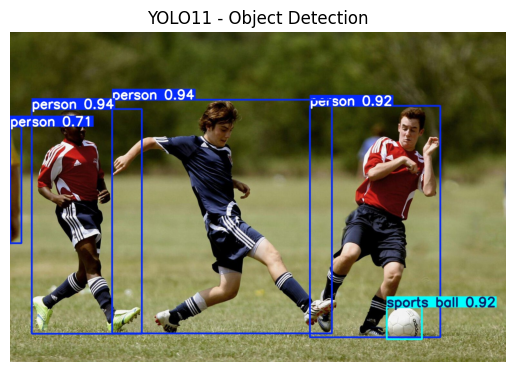

In [ ]:
# Load the pre-trained YOLOv11-Medium model
img_path = "football.jpg"
model_type = "yolo11l.pt"

prediction(model_type, img_path, task = "Object Detection")

### **Inference 2**


image 1/1 /content/zebra.jpg: 448x640 5 zebras, 37.6ms
Speed: 2.4ms preprocess, 37.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2


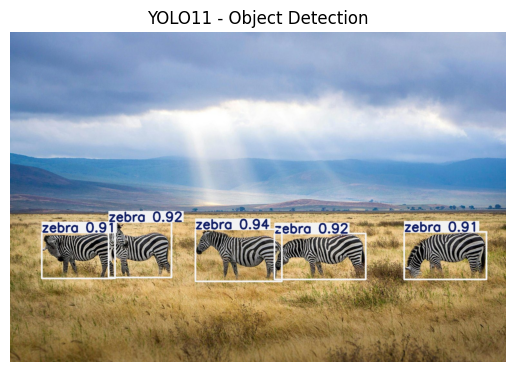

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [ ]:
img_path = "zebra.jpg"
prediction(model_type, img_path, display_result= True, task = "Object Detection")

### **Inference 3**


image 1/1 /content/monitor.jpg: 448x640 1 person, 1 tv, 1 mouse, 1 keyboard, 1 cell phone, 37.6ms
Speed: 2.4ms preprocess, 37.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3


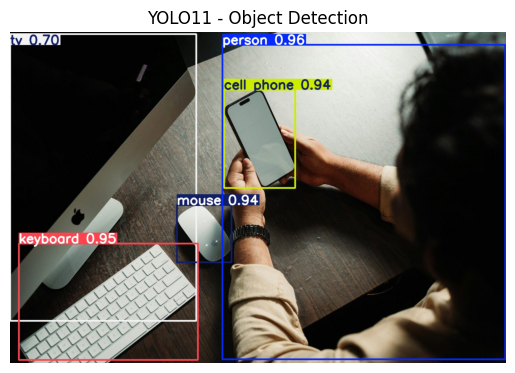

In [ ]:
img_path = "monitor.jpg"
prediction(model_type, img_path, task = "Object Detection")

### **Inference 4**


image 1/1 /content/kitchen.jpg: 448x640 2 cups, 1 bowl, 1 dining table, 2 ovens, 1 sink, 1 refrigerator, 37.9ms
Speed: 2.5ms preprocess, 37.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


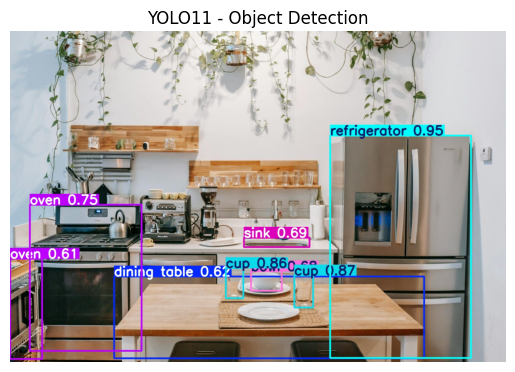

In [ ]:
img_path = "kitchen.jpg"
prediction(model_type, img_path, task = "Object Detection")

### **Inference 5**


image 1/1 /content/cat-dog.jpg: 640x448 1 cat, 1 dog, 2 potted plants, 54.6ms
Speed: 2.1ms preprocess, 54.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict6


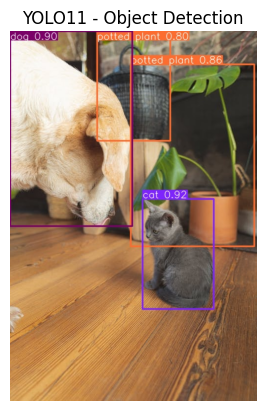

In [ ]:
img_path = "cat-dog.jpg"
prediction(model_type, img_path, task = "Object Detection")

# **Pose Estimation**

In [ ]:
model_type = "yolo11l-pose.pt"


image 1/1 /content/football.jpg: 448x640 4 persons, 39.1ms
Speed: 2.6ms preprocess, 39.1ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/pose/predict


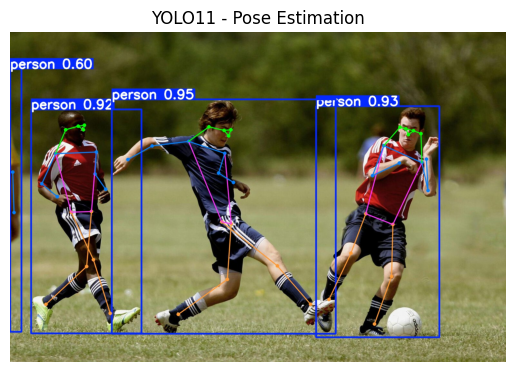

In [ ]:
img_path = "football.jpg"

# Predict with the model
prediction(model_type, img_path, task = "Pose Estimation")

# **Instance Segmentation**

In [ ]:
# Load a model
model_type = "yolo11l-seg.pt"


image 1/1 /content/football.jpg: 448x640 4 persons, 1 sports ball, 47.5ms
Speed: 2.8ms preprocess, 47.5ms inference, 4.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict


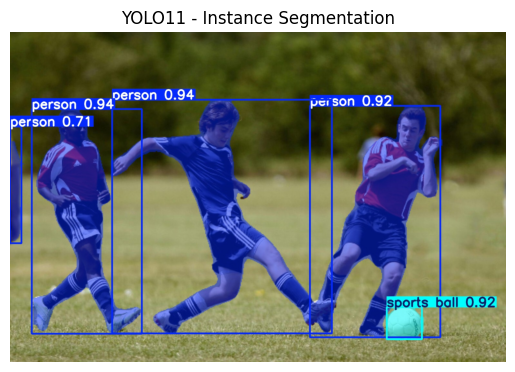

In [ ]:
img_path = "football.jpg"

# Predict with the model
prediction(model_type, img_path, task = "Instance Segmentation")

# **Classification**

In [ ]:
model_type = "yolo11l-cls.pt"


image 1/1 /content/tiger.jpg: 224x224 tiger 0.70, tiger_cat 0.29, jaguar 0.00, lynx 0.00, cheetah 0.00, 8.6ms
Speed: 32.6ms preprocess, 8.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


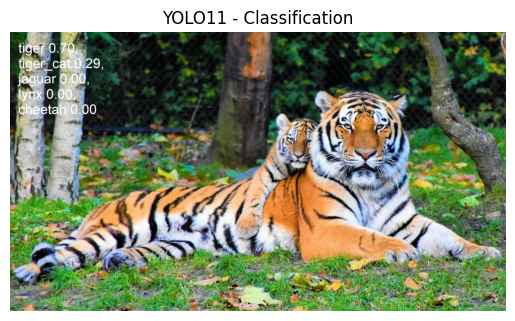

In [ ]:
img_path = "tiger.jpg"

# Predict with the model
prediction(model_type, img_path, task = "Classification")

# **Oriented Bounding Box (OBB)**

In [ ]:
model_type = "yolo11l-obb.pt"


image 1/1 /content/boat.jpg: 1024x768 88.2ms
Speed: 5.8ms preprocess, 88.2ms inference, 24.9ms postprocess per image at shape (1, 3, 1024, 768)
Results saved to runs/obb/predict


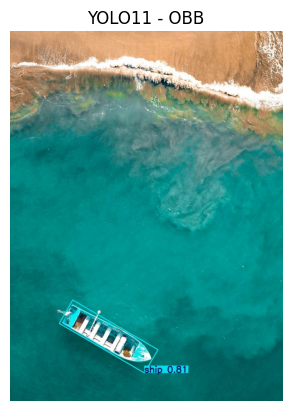

In [ ]:
img_path = "boat.jpg"

prediction(model_type, img_path, task = "OBB")

To know more about architecture details of YOLO models, you may find our [Mastering All YOLO Models](https://learnopencv.com/mastering-all-yolo-models/) summary article to be useful.



While this bootcamp provides a great start, our full course offers detailed explanations, hands-on projects, and expert guidance to help you master PyTorch and deep learning. Enroll here: [Deep Learning with PyTorch Course](https://opencv.org/university/deep-learning-with-pytorch/)